<a href="https://colab.research.google.com/github/Sylvestrestone/7688581-Expert-Git-GitHub/blob/main/TP_4_Detection_de_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP 4 : Détection de Spam

**Objectif:**
Ce TP vise à concevoir un modèle de classification de spams en utilisant le dataset SMS Spam Collection.



1. Chargement et visualisation du dataset
```



# charger les librairies necessaires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

chargment des donnes

In [25]:
import pandas as pd

# Charger le dataset avec le bon encodage
url = "https://raw.githubusercontent.com/mohitgupta-1O1/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv"
df = pd.read_csv(url, encoding='latin-1')
# Garder uniquement les colonnes utiles
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

Visualisation des premières lignes du dataset

In [26]:
# Aperçu du dataset
print(df.head())
print(df['label'].value_counts())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
print(data.isnull().sum())

Label      0
Message    0
dtype: int64


In [ ]:
# Statistiques du dataset
print(data["Label"].value_counts())

Label
ham     4825
spam     747
Name: count, dtype: int64


notre dataset soit très déséquilibré, avec beaucoup plus de messages classés comme ham (4825) que comme spam (747)

2. Prétraitement des Données

In [31]:
import numpy as np

# 2. Prétraitement des Données
import re

# Fonction de nettoyage de texte
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Enlever les caractères spéciaux
    return text

# Application du nettoyage
df['message_clean'] = df['message'].apply(clean_text)

print(df.head())

  label                                            message  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                       message_clean  
0  go until jurong point crazy available only in ...  
1                            ok lar joking wif u oni  
2  free entry in 2 a wkly comp to win fa cup fina...  
3        u dun say so early hor u c already then say  
4  nah i dont think he goes to usf he lives aroun...  


In [33]:
import re
import string
from sklearn.preprocessing import LabelEncoder

# Nettoyage du texte
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\d+", "", text)  # Supprimer les chiffres
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Supprimer les URLs
    text = re.sub(r'[^\w\s]', '', text)  # Supprimer les signes de ponctuation
    text = text.strip()
    return text

# Apply the clean_text function to the 'message' column instead of 'text'
df['clean_text'] = df['message'].apply(clean_text)

# Encodage des labels
encoder = LabelEncoder()
df['label_num'] = encoder.fit_transform(df['label'])  # ham = 0, spam = 1


In [34]:
print(df.head())


  label                                            message  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                       message_clean  \
0  go until jurong point crazy available only in ...   
1                            ok lar joking wif u oni   
2  free entry in 2 a wkly comp to win fa cup fina...   
3        u dun say so early hor u c already then say   
4  nah i dont think he goes to usf he lives aroun...   

                                          clean_text  label_num  
0  go until jurong point crazy available only in ...          0  
1                            ok lar joking wif u oni          0  
2  free entry in  a wkly comp to win fa cup final...          1  
3        u dun say so earl

3. Tokenization et Séquencement

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Paramètres
vocab_size = 5000
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

# Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(df['clean_text'])

sequences = tokenizer.texts_to_sequences(df['clean_text'])
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


Tokenization et Séquencement p

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Paramètres du tokenizer
vocab_size = 5000
oov_tok = "<OOV>"
max_length = 100
padding_type = 'post'
trunc_type = 'post'

# Initialisation et entraînement du tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(df['message_clean'])

# Conversion des textes en séquences
sequences = tokenizer.texts_to_sequences(df['message_clean'])

# Padding des séquences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


4. Séparation des données en Train/Test

In [37]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(padded)
y = np.array(df['label_num'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encodage des étiquettes ('ham' → 0, 'spam' → 1)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['label'])

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Conversion en tableau numpy
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


**Entraînement du modèle (LSTM) p

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

embedding_dim = 64

# Architecture du modèle
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Pour la classification binaire
])

# Compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Résumé
model.summary()

# Entraînement
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=64)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.8574 - loss: 0.4842 - val_accuracy: 0.8655 - val_loss: 0.3972
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.8763 - loss: 0.3846 - val_accuracy: 0.8655 - val_loss: 0.3961
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.8631 - loss: 0.4044 - val_accuracy: 0.8655 - val_loss: 0.3975
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.8709 - loss: 0.3921 - val_accuracy: 0.8655 - val_loss: 0.3955
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.8693 - loss: 0.3947 - val_accuracy: 0.8655 - val_loss: 0.4025


In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

embedding_dim = 64

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Entraînement
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=64)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.8243 - loss: 0.4891 - val_accuracy: 0.8655 - val_loss: 0.3968
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.8643 - loss: 0.4041 - val_accuracy: 0.8655 - val_loss: 0.3957
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.8707 - loss: 0.3919 - val_accuracy: 0.8655 - val_loss: 0.3966
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.8576 - loss: 0.4095 - val_accuracy: 0.8655 - val_loss: 0.3999
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.8654 - loss: 0.4030 - val_accuracy: 0.8655 - val_loss: 0.3953


Évaluation & visualisation des résultats

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8760 - loss: 0.3758

Test Accuracy: 0.8655


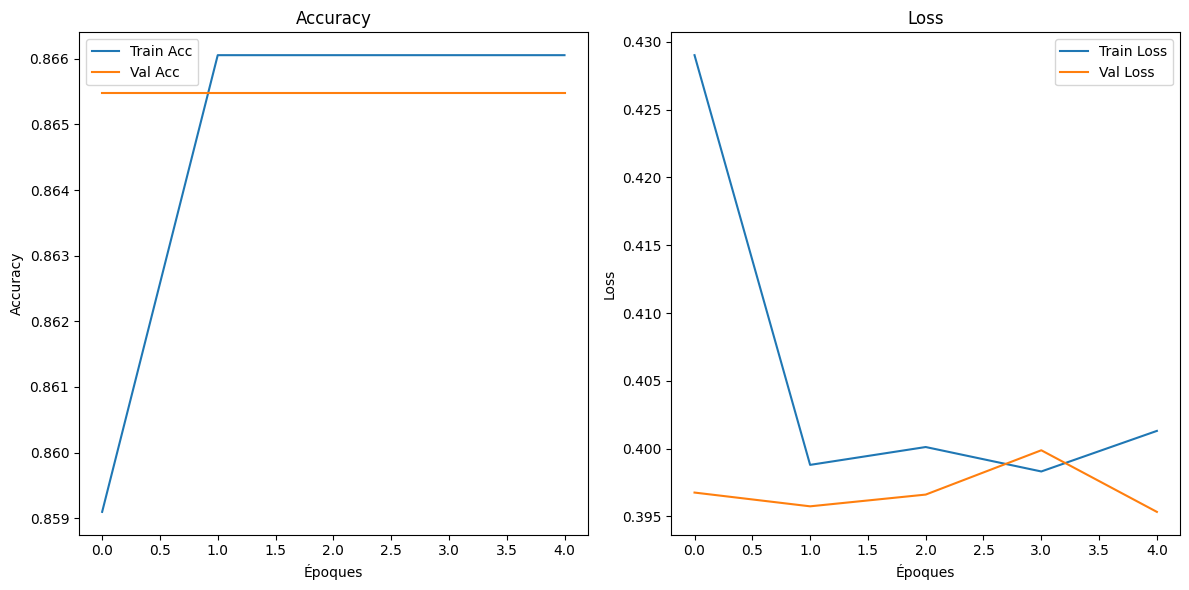

In [45]:
import matplotlib.pyplot as plt

# Évaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Courbes d'apprentissage
def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.xlabel('Époques')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Époques')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

Matrice de confusion

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step


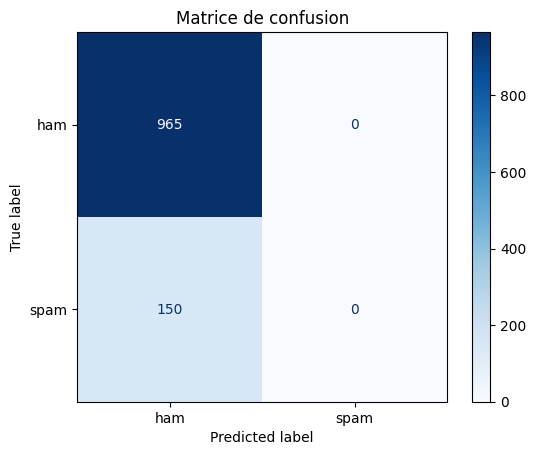

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prédictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()


Courbe ROC & AUC (Area Under Curve)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


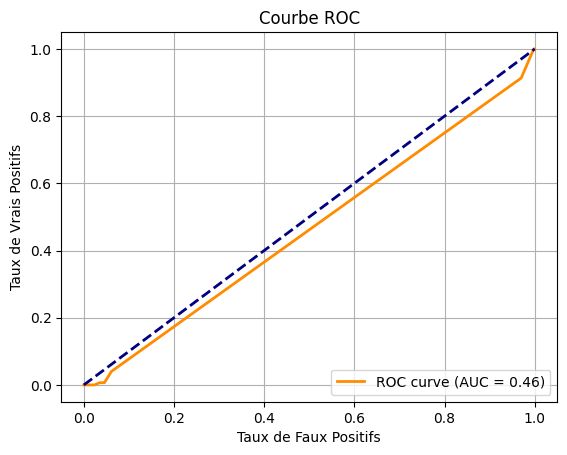

In [47]:
from sklearn.metrics import roc_curve, auc

# Score de prédiction
y_pred_prob = model.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Courbe ROC')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Courbe de précision vs rappel (Precision-Recall Curve)

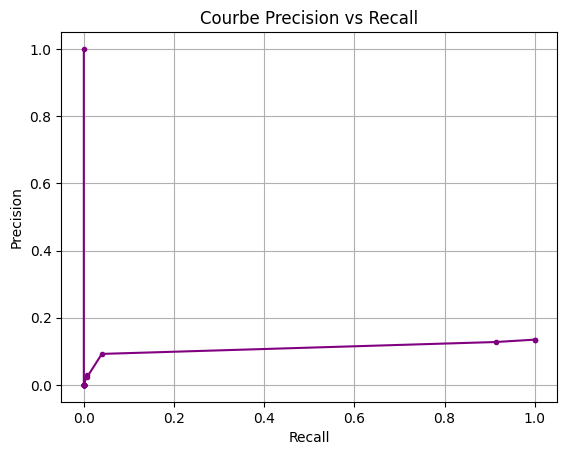

In [48]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(recall, precision, marker='.', color='purple')
plt.title('Courbe Precision vs Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()
